# Disaster Tweet Analyzer

### Import Libraries


In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KAUSHAL/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KAUSHAL/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\KAUSHAL/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Data Acquisition from CSV File

In [38]:
# Load the dataset from a CSV file
data = pd.read_csv('tweets.csv')  
data.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [39]:
data.shape

(11370, 5)

In [40]:
data.isnull().sum()

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

###  Initial Exploration and Data Overview

In [41]:
# Basic information about the dataset
data.info() # Information about data types and non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


In [42]:
data.describe() # Statistical summary of numeric columns



,id,target
count,11370.000000,11370.000000
mean,5684.500000,0.185928
std,3282.380615,0.389066
min,0.000000,0.000000
25%,2842.250000,0.000000
50%,5684.500000,0.000000
75%,8526.750000,0.000000
max,11369.000000,1.000000


In [43]:
# Explore the target class distribution
data['target'].value_counts()  # Count the occurrences of each target class


target
0    9256
1    2114
Name: count, dtype: int64

### Visualize Target Class Distribution

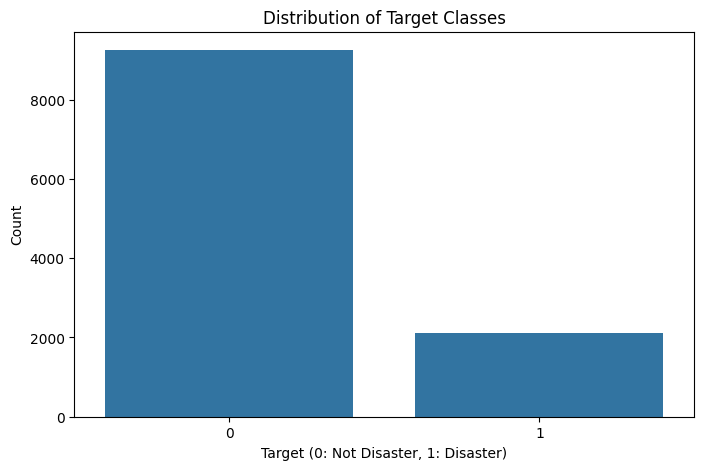

In [44]:
# Visualize the target class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Classes')
plt.xlabel('Target (0: Not Disaster, 1: Disaster)')
plt.ylabel('Count')
plt.show()


### Data Cleaning - Clean Text

In [45]:
# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    return text

# Apply the clean_text function to the 'text' column
data['text'] = data['text'].apply(clean_text)


### Data Cleaning - Remove Stopwords

In [46]:
# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()  # Split the text into words
    filtered_words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(filtered_words)  # Rejoin words into a string

# Apply the stopword removal function
data['text'] = data['text'].apply(remove_stopwords)


### Data Cleaning - Lemmatization

In [47]:
# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize text
def lemmatize_text(text):
    words = text.split()  # Split the text into words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize each word
    return ' '.join(lemmatized_words)  # Rejoin words into a string

# Apply the lemmatization function
data['text'] = data['text'].apply(lemmatize_text)


### Remove Duplicates and Analyze Text Length

In [48]:
# Remove duplicate tweets based on the 'text' column
initial_rows = data.shape[0]
data = data.drop_duplicates(subset='text', keep='first')
final_rows = data.shape[0]
print(f"Duplicates removed: {initial_rows - final_rows}, Remaining rows: {final_rows}")

# Create a new column 'text_length' for the length of each tweet
data['text_length'] = data['text'].apply(len)


Duplicates removed: 549, Remaining rows: 10821


### Visualize Distribution of Tweet Lengths

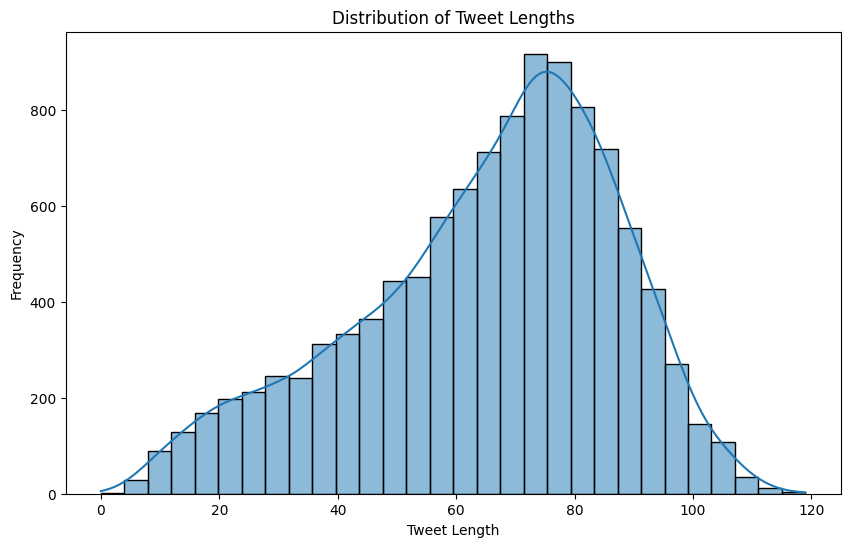

In [49]:
# Visualize the distribution of tweet lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=30, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()


### Word Cloud for Disaster Tweets

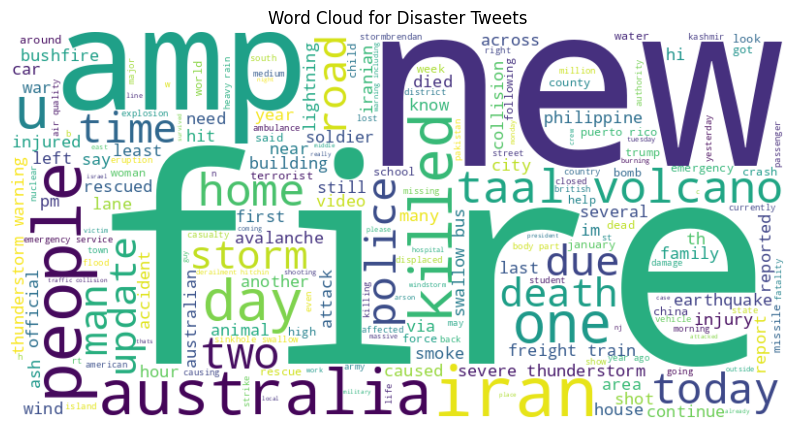

In [50]:
# Generate a Word Cloud for disaster-related tweets (target = 1)
disaster_tweets = data[data['target'] == 1]['text']
disaster_words = ' '.join(disaster_tweets)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(disaster_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Disaster Tweets')
plt.show()


### Word Cloud for Non-Disaster Tweets

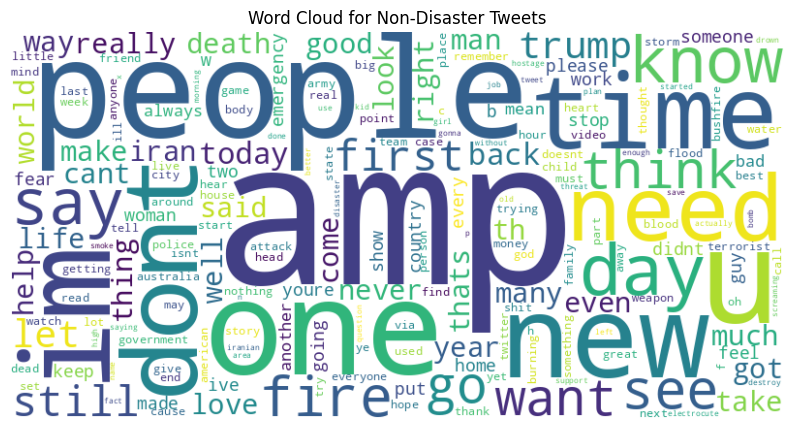

In [51]:
# Generate a Word Cloud for non-disaster tweets (target = 0)
non_disaster_tweets = data[data['target'] == 0]['text']
non_disaster_words = ' '.join(non_disaster_tweets)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_disaster_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Disaster Tweets')
plt.show()


### Handle Missing Values

In [52]:
# Check for any remaining missing values
print(f"Missing values:\n{data.isnull().sum()}")

# Drop rows where 'text' is missing (if any)
data = data.dropna(subset=['text'])
print(f"Missing values handled. Remaining rows: {data.shape[0]}")


Missing values:
id                0
keyword           0
location       3290
text              0
target            0
text_length       0
dtype: int64
Missing values handled. Remaining rows: 10821


### Visualize Tweet Length by Target Class


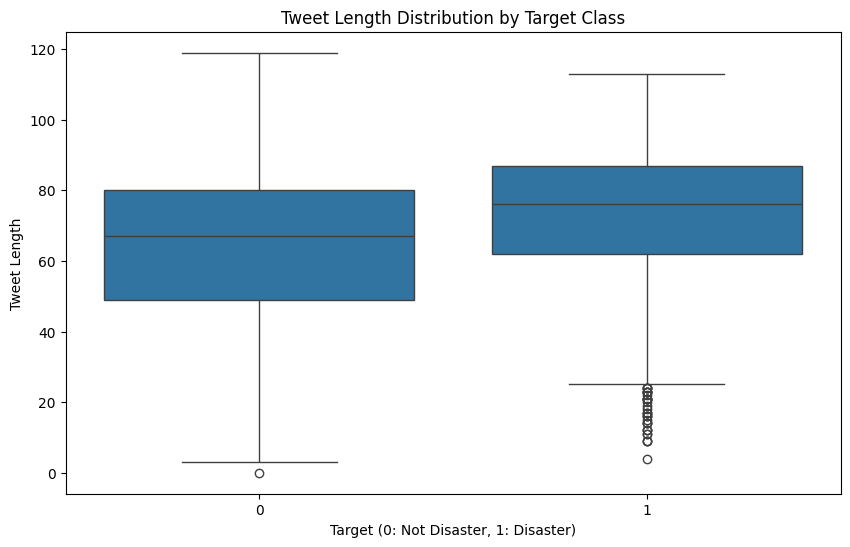

In [53]:
# Visualize tweet length distribution for disaster and non-disaster tweets
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='text_length', data=data)
plt.title('Tweet Length Distribution by Target Class')
plt.xlabel('Target (0: Not Disaster, 1: Disaster)')
plt.ylabel('Tweet Length')
plt.show()


### Most Frequent Words in Disaster Tweets

C:\Users\KAUSHAL\AppData\Local\Temp\ipykernel_20676\2194638187.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disaster_word_freq.values, y=disaster_word_freq.index, palette='Blues_d')


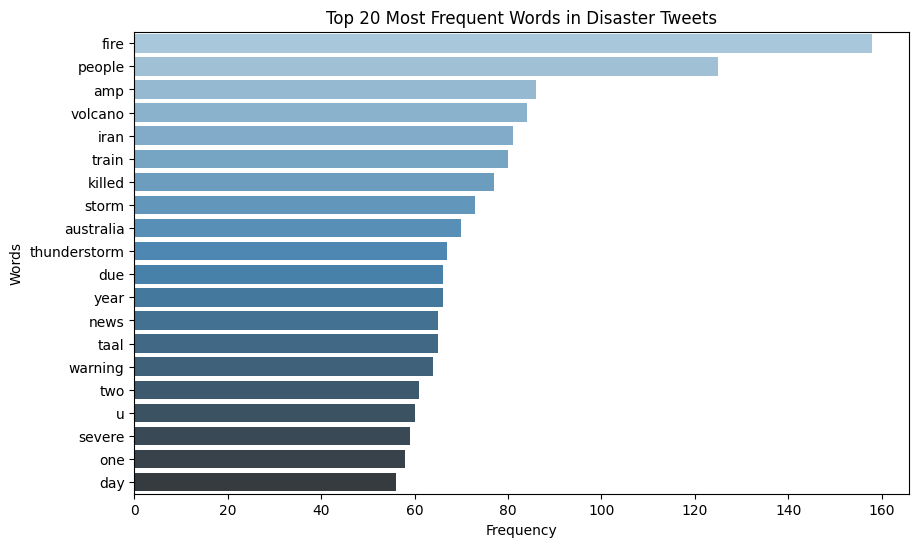

In [54]:
# Get the most frequent words in disaster tweets
disaster_words = ' '.join(data[data['target'] == 1]['text']).split()
disaster_word_freq = pd.Series(disaster_words).value_counts().head(20)

# Visualize the most frequent words in disaster tweets
plt.figure(figsize=(10, 6))
sns.barplot(x=disaster_word_freq.values, y=disaster_word_freq.index, palette='Blues_d')
plt.title('Top 20 Most Frequent Words in Disaster Tweets')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


### Most Frequent Words in Non-Disaster Tweets

C:\Users\KAUSHAL\AppData\Local\Temp\ipykernel_20676\1141720660.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=non_disaster_word_freq.values, y=non_disaster_word_freq.index, palette='Reds_d')


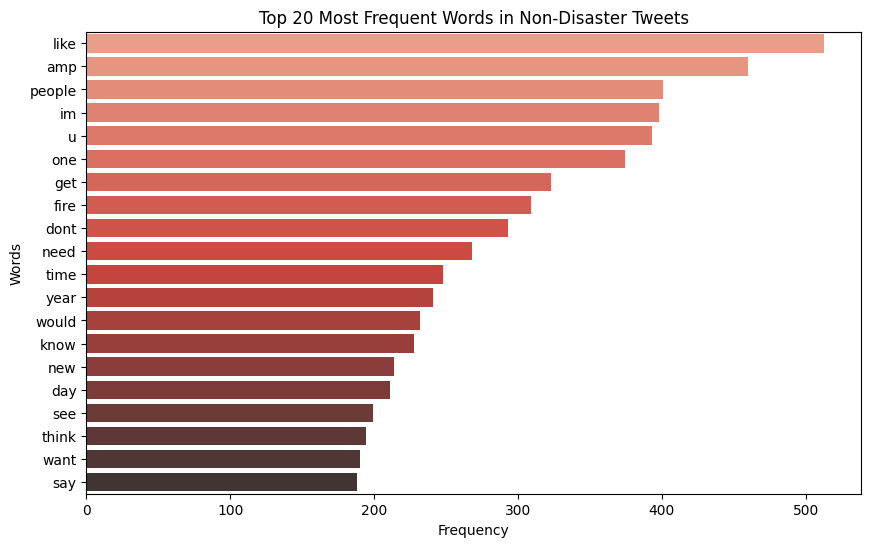

In [55]:
# Get the most frequent words in non-disaster tweets
non_disaster_words = ' '.join(data[data['target'] == 0]['text']).split()
non_disaster_word_freq = pd.Series(non_disaster_words).value_counts().head(20)

# Visualize the most frequent words in non-disaster tweets
plt.figure(figsize=(10, 6))
sns.barplot(x=non_disaster_word_freq.values, y=non_disaster_word_freq.index, palette='Reds_d')
plt.title('Top 20 Most Frequent Words in Non-Disaster Tweets')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


### Feature Extraction - Word Count, Character Count, and Average Word Length

In [56]:
# Feature 1: Word count for each tweet
data['word_count'] = data['text'].apply(lambda x: len(x.split()))

# Feature 2: Character count for each tweet
data['char_count'] = data['text'].apply(lambda x: len(x))

# Feature 3: Average word length in each tweet
data['avg_word_length'] = data['char_count'] / data['word_count']

# Display the first few rows to see the new features
data[['text', 'word_count', 'char_count', 'avg_word_length']].head()


,text,word_count,char_count,avg_word_length
0,communal violence bhainsa telangana stone pelt...,12,86,7.166667
1,telangana section imposed bhainsa january clas...,11,76,6.909091
2,arsonist set car ablaze dealership,5,34,6.800000
4,lord jesus love brings freedom pardon fill hol...,13,73,5.615385
5,child chinese tweet would gone viral social me...,15,87,5.800000


### Feature Extraction - Punctuation Count and Hashtag Count

In [57]:
# Feature 4: Count the number of punctuations in each tweet
def count_punctuation(text):
    punctuations = re.findall(r'[^\w\s]', text)
    return len(punctuations)

data['punctuation_count'] = data['text'].apply(count_punctuation)

# Feature 5: Count the number of hashtags in each tweet
def count_hashtags(text):
    hashtags = re.findall(r'#\w+', text)
    return len(hashtags)

data['hashtag_count'] = data['text'].apply(count_hashtags)

# Display the first few rows to see the new features
data[['text', 'punctuation_count', 'hashtag_count']].head()


,text,punctuation_count,hashtag_count
0,communal violence bhainsa telangana stone pelt...,0,0
1,telangana section imposed bhainsa january clas...,0,0
2,arsonist set car ablaze dealership,0,0
4,lord jesus love brings freedom pardon fill hol...,0,0
5,child chinese tweet would gone viral social me...,0,0


###  Feature Extraction - Uppercase Word Count and URL Count

In [58]:
# Feature 6: Count the number of uppercase words in each tweet
def count_uppercase_words(text):
    words = text.split()
    uppercase_words = [word for word in words if word.isupper()]
    return len(uppercase_words)

data['uppercase_word_count'] = data['text'].apply(count_uppercase_words)

# Feature 7: Count the number of URLs (although already removed, for reference)
def count_urls(text):
    return len(re.findall(r'http[s]?://\S+', text))

data['url_count'] = data['text'].apply(count_urls)

# Display the first few rows to see the new features
data[['text', 'uppercase_word_count', 'url_count']].head()


,text,uppercase_word_count,url_count
0,communal violence bhainsa telangana stone pelt...,0,0
1,telangana section imposed bhainsa january clas...,0,0
2,arsonist set car ablaze dealership,0,0
4,lord jesus love brings freedom pardon fill hol...,0,0
5,child chinese tweet would gone viral social me...,0,0


### Visualizing New Features - Word Count and Character Count Distribution

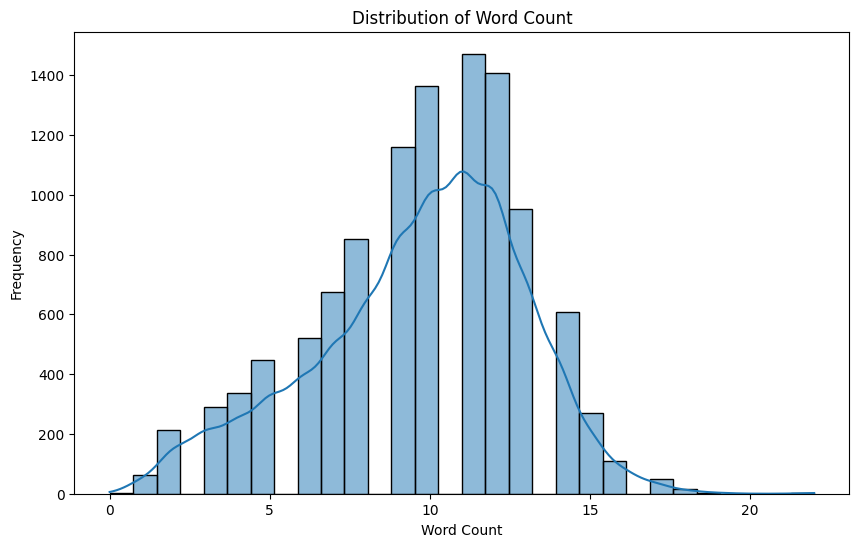

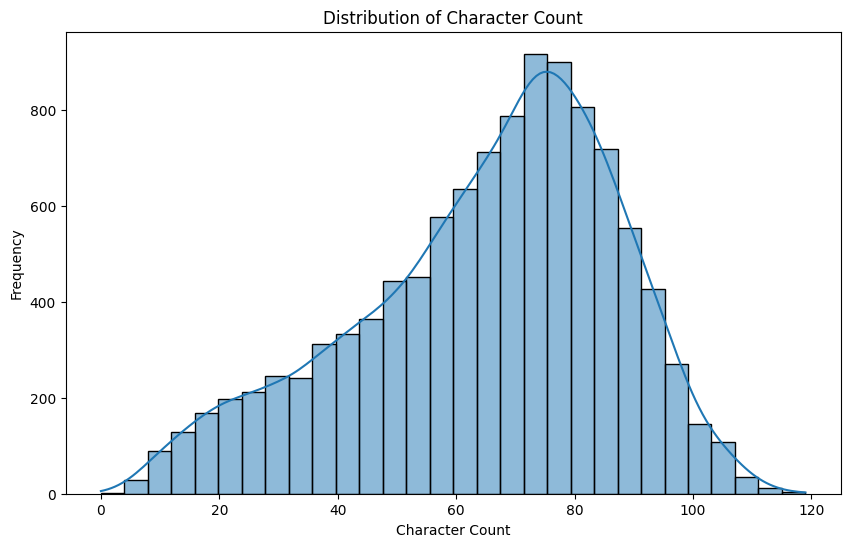

In [59]:
# Visualize the distribution of word count
plt.figure(figsize=(10, 6))
sns.histplot(data['word_count'], bins=30, kde=True)
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of character count
plt.figure(figsize=(10, 6))
sns.histplot(data['char_count'], bins=30, kde=True)
plt.title('Distribution of Character Count')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()


### Save the Cleaned Data

In [60]:
# Save the cleaned and processed dataset to a new CSV file
data.to_csv('cleaned_disaster_tweets.csv', index=False)


# Disaster Tweet Analyzer - Weekly Report

## Overview
Analyzed tweets related to disasters to understand their characteristics and prepare for disaster monitoring.

## Libraries Used
- **pandas**: Data manipulation
- **numpy**: Numerical operations
- **re**: Regular expressions
- **nltk**: Natural language processing
- **matplotlib**: Data visualization
- **seaborn**: Statistical data visualization
- **wordcloud**: Word cloud generation

## Data Acquisition
- Loaded dataset from `tweets.csv`.
- Checked data shape and missing values.

## Data Cleaning
1. **Text Cleaning**: Lowercased, removed URLs and special characters.
2. **Stopwords Removal**: Filtered out common English stopwords.
3. **Lemmatization**: Reduced words to their base form.
4. **Duplicates**: Removed duplicate tweets.
5. **Text Length**: Added `text_length` column to analyze tweet lengths.

## Visualizations
- **Target Class Distribution**: Visualized using count plot.
- **Tweet Length Distribution**: Visualized using histogram.
- **Word Clouds**: Generated for disaster and non-disaster tweets.

## Feature Extraction
- Extracted features:
  - Word count
  - Character count
  - Average word length
  - Punctuation count
  - Hashtag count
  - Uppercase word count
  - URL count

## Conclusion
- Cleaned and processed dataset saved as `cleaned_disaster_tweets.csv`.
- Ready for further analysis and modeling.

